In [ ]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
df=datasets.fetch_california_housing()
dataframe=pd.DataFrame(data=df.data,columns=df.feature_names)
target=df.target

In [ ]:
dataframe['target']=target
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


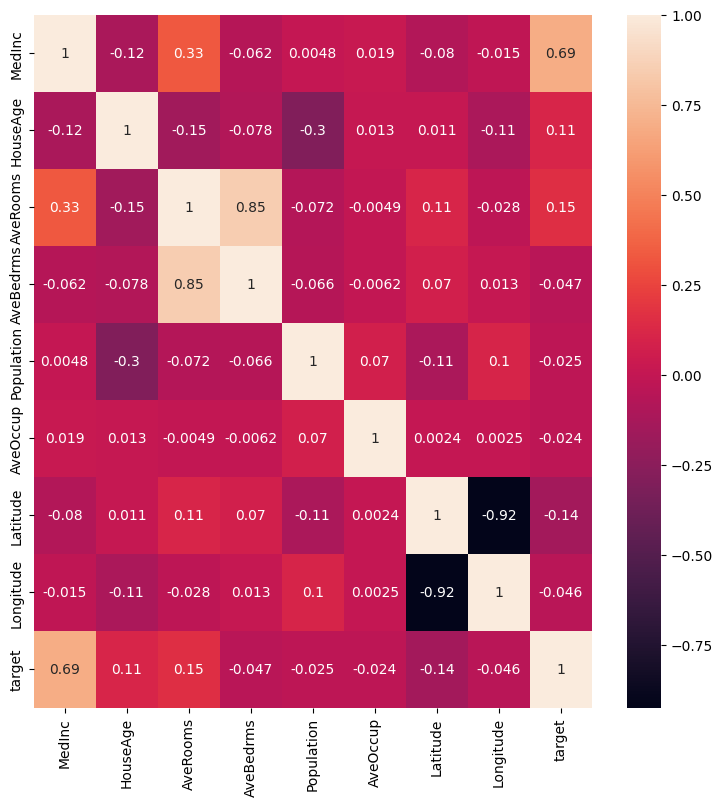

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(dataframe.corr(),annot=True);

In [ ]:
X=dataframe.drop(['target'],axis=1)
Y=dataframe['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import Lasso,Ridge
model=Lasso(alpha=1)
model1=Ridge(alpha=1)
model.fit(X_train,Y_train)
model1.fit(X_train,Y_train)

Ridge(alpha=1)

In [ ]:
preds=model.predict(X_train)
mse=metrics.mean_squared_error(Y_train,preds)
r2score=metrics.mean_squared_error(Y_train,preds)
cv=cross_val_score(model,X_train,Y_train)
print(f'On the training dataset, MSE : {mse:.2f} R2 : {r2score:.2f} CV: {cv.mean():.2f}')

On the training dataset, MSE : 0.95 R2 : 0.95 CV: 0.29


In [ ]:
preds=model.predict(X_test)
mse=metrics.mean_squared_error(Y_test,preds)
r2score=metrics.r2_score(Y_test,preds)
cv=cross_val_score(model,X_test,Y_test)
print(f'On the test dataset, MSE : {mse:.2f} R2 : {r2score:.2f} CV: {cv.mean():.2f}')

On the test dataset, MSE : 0.94 R2 : 0.28 CV: 0.26


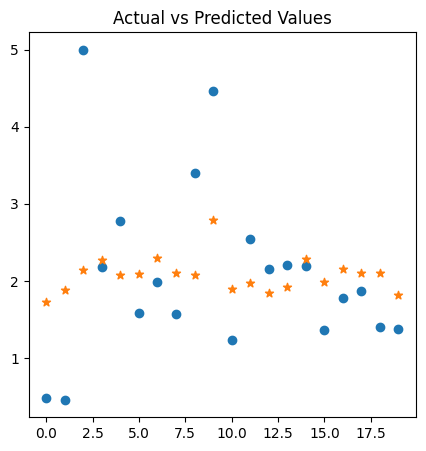

In [ ]:
def plot(preds,Y_test):
  preds1=preds[:20]
  Y_test1=Y_test[:20]
  plt.figure(figsize=(5,5))
  plt.scatter(range(len(Y_test1)),Y_test1)
  plt.scatter(range(len(preds1)),preds1,marker='*')
  plt.title('Actual vs Predicted Values')

plot(preds,Y_test)

In [ ]:
alphas = [0.001,0.01,0.1,1,10,100]
cv_scores=[cross_val_score(Lasso(alpha=alpha),X_train,Y_train,cv=5).mean() for alpha in alphas]
optimal_alpha = alphas[cv_scores.index(max(cv_scores))]

In [ ]:
model=Lasso(alpha=optimal_alpha)
model.fit(X_train,Y_train)

Lasso(alpha=0.001)

In [ ]:
preds=model.predict(X_test)
mse=metrics.mean_squared_error(Y_test,preds)
r2score=metrics.r2_score(Y_test,preds)
cv=cross_val_score(model,X_test,Y_test)
print(f'On the test dataset, MSE : {mse:.2f} R2 : {r2score:.2f} CV: {cv.mean():.2f}')

On the test dataset, MSE : 0.55 R2 : 0.58 CV: 0.57


In [ ]:
def plot(preds,Y_test)